# Fifa19 Exercise - Solutions

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [Fifa19 Dataset](https://www.kaggle.com/winterbreeze/fifa19eda) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

#### Read fifa_eda.csv 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(13.5,10.5)})

In [2]:
df = pd.read_csv('data/fifa_eda.csv')

### New Part Visualiztion Questions

#### Draw the outliers of players value

<AxesSubplot:xlabel='Value'>

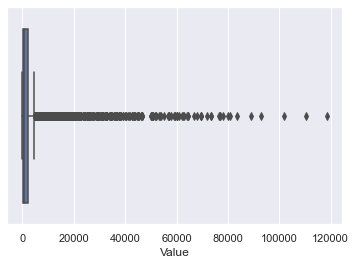

In [6]:
sns.boxplot(data = df , x= 'Value' )

#### find the average wage for each Nationality and draw the outliers in value for the top 5 nationality

In [7]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [8]:
df.columns
average_wage=df.groupby('Nationality').mean()['Wage'].sort_values(ascending=False).head(5)
average_wage.to_frame()


,Wage
Nationality,
Dominican Republic,71.000000
United Arab Emirates,39.000000
Gabon,26.933333
Armenia,22.000000
Croatia,21.682540


In [9]:
n=df.groupby('Nationality').sum()['Wage'].sort_values(ascending=False).head(5)

<AxesSubplot:xlabel='Wage'>

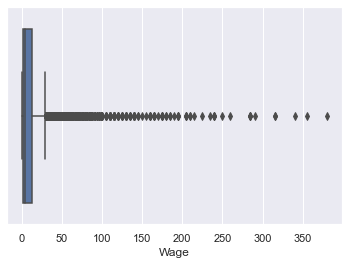

In [10]:
sns.boxplot(data =df[df['Nationality'].isin(n.index)] , x= 'Wage' )

#### Draw the distripution of players Height

<AxesSubplot:xlabel='Height', ylabel='Density'>

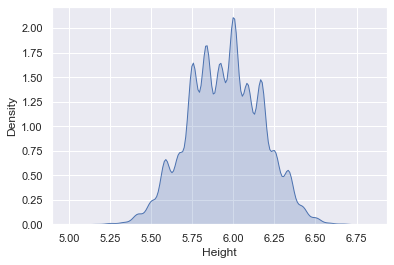

In [11]:
sns.kdeplot(data =df ,x = 'Height', shade = True)

#### What are the top 10 clubs in the wage and visualize the results ?

In [12]:
top_ten_clubs_wage=df.groupby('Club')['Wage'].sum().sort_values(ascending=False).head(10)
top_ten_clubs_wage.to_frame()


,Wage
Club,
Real Madrid,5017.0
FC Barcelona,4837.0
Manchester City,3741.0
Manchester United,3391.0
Juventus,3292.0
Chelsea,3249.0
Liverpool,2902.0
Tottenham Hotspur,2623.0
Arsenal,2588.0


<AxesSubplot:xlabel='Club', ylabel='Wage'>

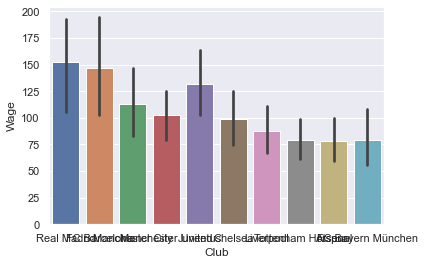

In [12]:
sns.barplot(data = df[df['Club'].isin(top_ten_clubs_wage.index)], x='Club',y='Wage',order = top_ten_clubs_wage.index)

#### is there any outlier in the Age find it with 1- visualization 2-  with pandas ?

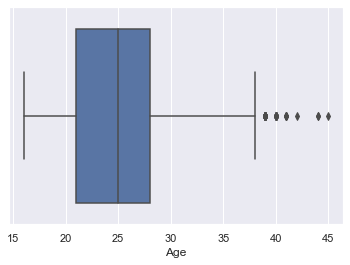

In [13]:
sns.boxplot(data = df , x = 'Age')
sns.set(rc={'figure.figsize':(5,8)})

In [14]:
df['Age'].describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [15]:
q3 = df['Age'].quantile(q=0.75)

In [16]:
q1 = df['Age'].quantile(q=0.25)

In [17]:
IQR = q3 - q1 
IQR

7.0

In [18]:
df[(df['Age']<q1) | (df['Age']> q3)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000.0,420.0,Right,4.0,4.0,RCM,2012,2020-01-01,5.666667,146.0,137400.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,Right,5.0,3.0,RS,2014,2021-01-01,6.000000,190.0,164000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000.0,380.0,Right,4.0,3.0,RCB,2005,2020-01-01,6.000000,181.0,104600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


#### Is there a correlation between Value and Overall and viusalize the results with two graphs?**

In [19]:
correlation=df['Value'].corr(df['Overall'])

<AxesSubplot:xlabel='Value', ylabel='Overall'>

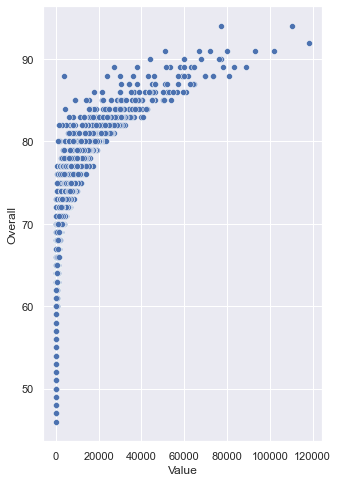

In [20]:
sns.scatterplot(data = df , x = 'Value', y = 'Overall')

<AxesSubplot:xlabel='Overall', ylabel='Value'>

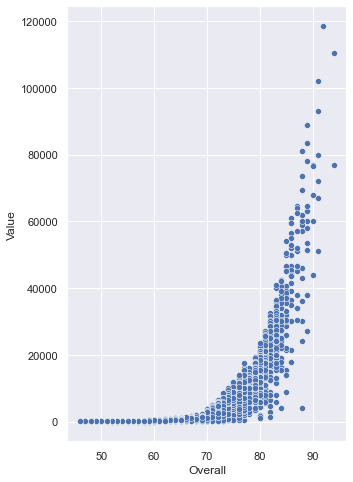

In [21]:
sns.scatterplot(data = df , y = 'Value', x = 'Overall')

#### what are the ratio of the Preferred Foot and visualize with a graph ?

In [22]:
df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

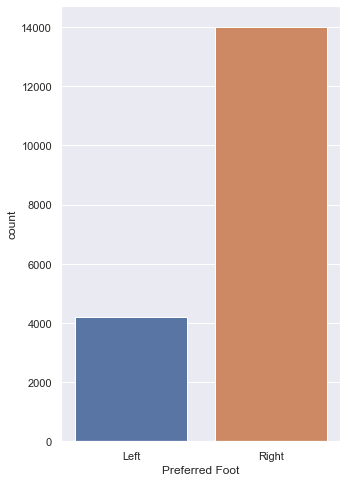

In [23]:
sns.countplot(data = df , x= 'Preferred Foot')

#### what are the top 10 average overall clubs and visualize with a graph ?

In [24]:
avreage_overall_clubs = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
avreage_overall_clubs.index

Index(['Juventus', 'Napoli', 'Inter', 'Real Madrid', 'Milan', 'FC Barcelona',
       'Paris Saint-Germain', 'Roma', 'Manchester United',
       'FC Bayern München'],
      dtype='object', name='Club')

<AxesSubplot:xlabel='Club', ylabel='Overall'>

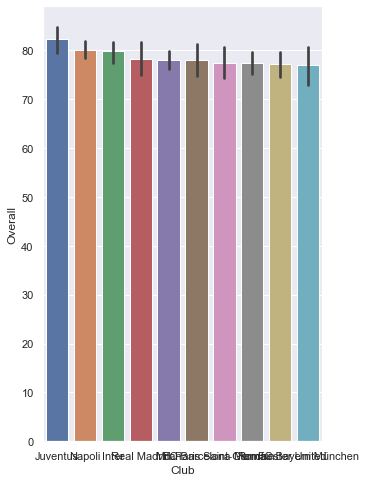

In [25]:
sns.barplot(data = df[df['Club'].isin(avreage_overall_clubs.index)], 
            x= 'Club', y= 'Overall', order =avreage_overall_clubs.index )

**What are the top 5 most common nationality and visualize them with a graph?**

In [26]:
top_five_most_common_nationality =df['Nationality'].value_counts().sort_values(ascending= False).head()
top_five_most_common_nationality.index

Index(['England', 'Germany', 'Spain', 'Argentina', 'France'], dtype='object')

<AxesSubplot:xlabel='Nationality', ylabel='count'>

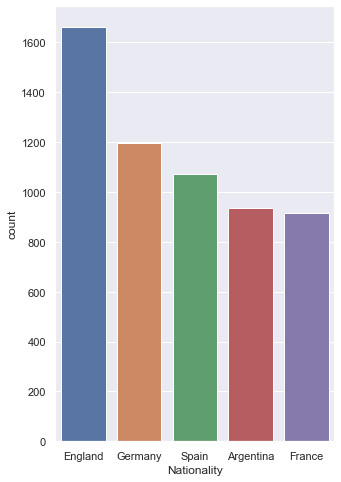

In [28]:
sns.countplot(data = df[df['Nationality'].isin(top_five_most_common_nationality.index)],x='Nationality'
              , order=top_five_most_common_nationality.index)

# Great Job!